In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

In [ ]:
model =  Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600

14/14 [==============================] - 14s 73ms/step - loss: 0.6903 - val_loss: 0.6813
Epoch 2/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6618 - val_loss: 0.6577
Epoch 3/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6389 - val_loss: 0.6349
Epoch 4/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6135 - val_loss: 0.6037
Epoch 5/600
14/14 [==============================] - 0s 19ms/step - loss: 0.5769 - val_loss: 0.5635
Epoch 6/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5358 - val_loss: 0.5210
Epoch 7/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4936 - val_loss: 0.4772
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4517 - val_loss: 0.4350
Epoch 9/600
14/14 [==============================] - 0s 17ms/step - loss: 0.4125 - val_loss: 0.3945
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3744 - val_loss: 0.35

In [39]:
losses = pd.DataFrame(model.history.history)

<Axes: >

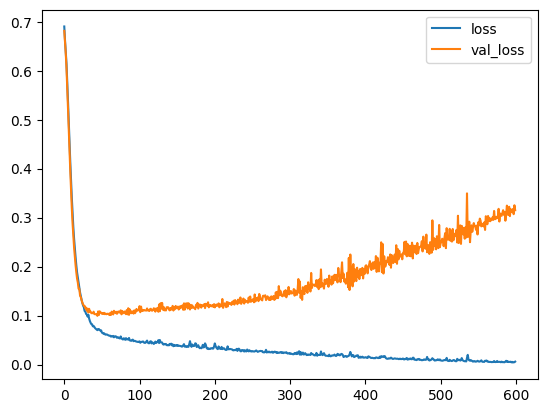

In [40]:
losses.plot()

In [41]:
model =  Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [44]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [45]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 4s 74ms/step - loss: 0.6724 - val_loss: 0.6534
Epoch 2/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6411 - val_loss: 0.6264
Epoch 3/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6125 - val_loss: 0.5978
Epoch 4/600
14/14 [==============================] - 0s 19ms/step - loss: 0.5833 - val_loss: 0.5648
Epoch 5/600
14/14 [==============================] - 0s 18ms/step - loss: 0.5492 - val_loss: 0.5261
Epoch 6/600
14/14 [==============================] - 0s 20ms/step - loss: 0.5119 - val_loss: 0.4850
Epoch 7/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4697 - val_loss: 0.4416
Epoch 8/600
14/14 [==============================] - 0s 21ms/step - loss: 0.4306 - val_loss: 0.3990
Epoch 9/600
14/14 [==============================] - 0s 17ms/step - loss: 0.3905 - val_loss: 0.3586
Epoch 10/600
14/14 [==============================] - 0s 23ms/step - loss: 0.3561 - val_loss: 0.3226

In [46]:
model_loss= pd.DataFrame(model.history.history)

<Axes: >

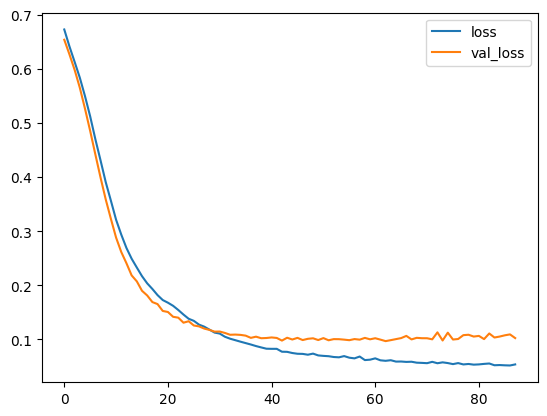

In [47]:
model_loss.plot()

In [48]:
model =  Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 3s 34ms/step - loss: 0.7011 - val_loss: 0.6820
Epoch 2/600
14/14 [==============================] - 0s 24ms/step - loss: 0.6856 - val_loss: 0.6740
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6747 - val_loss: 0.6650
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6600 - val_loss: 0.6533
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6599 - val_loss: 0.6378
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6544 - val_loss: 0.6268
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6344 - val_loss: 0.6148
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6222 - val_loss: 0.5958
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6108 - val_loss: 0.5776
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5865 - val_loss: 0.5552


In [50]:
model_loss= pd.DataFrame(model.history.history)

<Axes: >

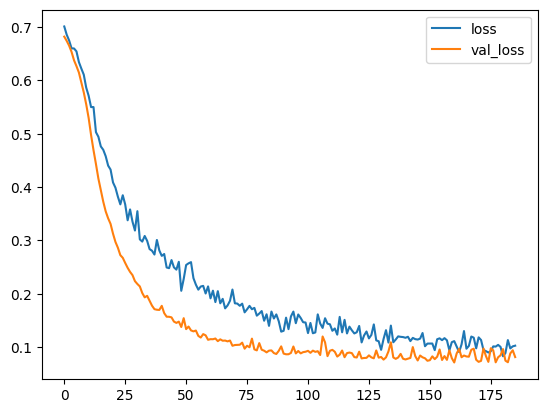

In [51]:
model_loss.plot()

In [58]:
predictions = model.predict(X_test)

predicted_classes =np.where(predictions > 0.5, 1,0)

5/5 [==============================] - 0s 4ms/step


In [59]:
predicted_classes

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [64]:
print(confusion_matrix(y_test,predicted_classes))

[[54  1]
 [ 2 86]]
